In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# import plotly.express as px
# import plotly.graph_objects as go

# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# from scipy import stats

# import wbgapi as wb

---


<img decoding="async" src="https://salonimmigration.com/wp-content/uploads/2021/07/Universite_Teluq_Logo_255x158-1.png" alt="Logo Universite TELUQ" width="355" height="258" class="size-full wp-image-1922 alignleft" />



---




# c'est ici que tout mon code commence



In [32]:
import wbgapi as wb
import requests
import plotly.express as px
import pandas as pd

In [33]:
df_country = wb.economy.DataFrame()

table = wb.economy.info()
table_dict = vars(table)
df_source = pd.DataFrame(table_dict.get('items')) # pour avoir la liste des pays et les id

type(df_source)
print((df_country))
df = pd.DataFrame(df_source, columns=['id', 'value']) 

lis_country = []

for index, row in df.iterrows():
    # print(row["id"], row["value"])
    lis_country.append((row["id"], row["value"]))
    
code_country = ''
country = ''
# lis_country[0][0] #y[lis_country.index('TGO')]
def check_code_country(code_input_country : str) -> True:
    # [T for item in lis_country if 'TGO' in item]
    if any(code_input_country in code for code in lis_country):
        global code_country, country
        for i in range(len(lis_country)):
            if lis_country[i][0] == value_input_country:
                print(f"Vous avez choisi ce pays:  {lis_country[i][1]} - {code_input_country}") 
                code_country, country = code_input_country, lis_country[i][1]
                return True
    return False
# les id doivent figurer dans la liste des id. sinon retourner une erreur

                            name  aggregate  longitude  latitude region  \
id                                                                        
ABW                        Aruba      False   -70.0167  12.51670    LCN   
AFE  Africa Eastern and Southern       True        NaN       NaN          
AFG                  Afghanistan      False    69.1761  34.52280    SAS   
AFW   Africa Western and Central       True        NaN       NaN          
AGO                       Angola      False    13.2420  -8.81155    SSF   
..                           ...        ...        ...       ...    ...   
XKX                       Kosovo      False    20.9260  42.56500    ECS   
YEM                  Yemen, Rep.      False    44.2075  15.35200    MEA   
ZAF                 South Africa      False    28.1871 -25.74600    SSF   
ZMB                       Zambia      False    28.2937 -15.39820    SSF   
ZWE                     Zimbabwe      False    31.0672 -17.83120    SSF   

    adminregion lendingT

## Enter country code:  
- Example: TGO, CAN, FRA, USA

In [34]:
value_input_country = str(input("Please, enter country code: ")).upper()


check_code_country(value_input_country)
print(code_country, country)

Please, enter country code: tgo
Vous avez choisi ce pays:  Togo - TGO
TGO Togo


In [35]:
gdp_indicator = wb.data.DataFrame('NY.GNP.PCAP.PP.KD', code_country, range(1990, 2022))  # PIB par habitant

gdp_indicator

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
TGO,1770.551265,1706.92941,1596.078634,1360.947396,1519.183636,1591.263266,1687.544386,1870.257074,1778.35937,1754.589802,...,1749.779178,1810.415963,1870.217408,1956.667097,1960.849843,1972.566518,2013.847742,2060.479039,2070.396557,2133.438363


<Axes: xlabel='economy'>

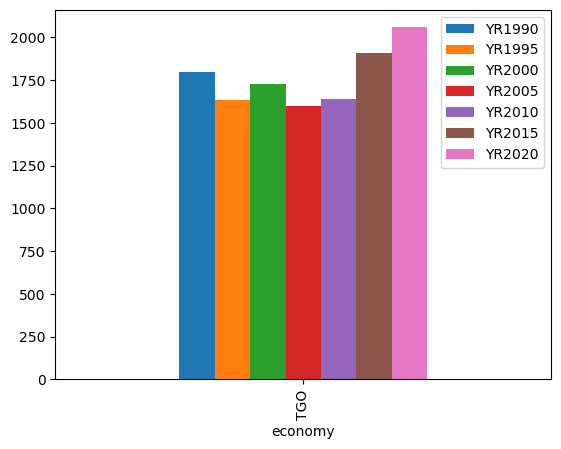

In [36]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar()

In [37]:
life_expectancy_indicator = wb.data.DataFrame('SP.DYN.LE00.IN', code_country, range(1990, 2022))  #Espérance de vie à la naissance, total (années)
life_expectancy_indicator

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
TGO,54.37,54.268,54.299,54.195,54.037,54.037,54.098,54.192,54.199,54.538,...,58.073,58.684,58.853,59.396,59.55,60.154,60.244,60.901,61.035,61.619


<Axes: xlabel='economy'>

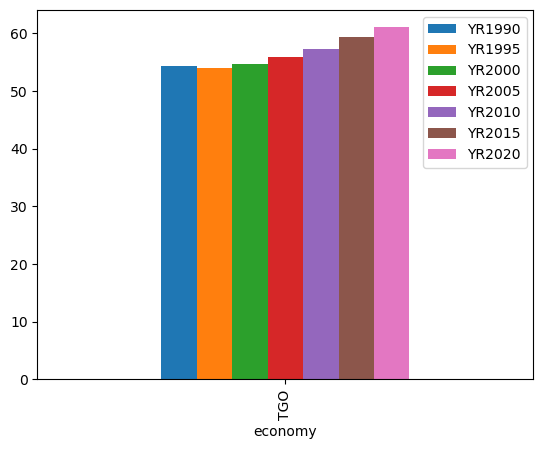

In [38]:
wb.data.DataFrame(['SP.DYN.LE00.IN'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() #graphique en barre pour l'indicateur choisi

In [39]:
co2_emissions_indicator = wb.data.DataFrame('EN.ATM.CO2E.PC', code_country, range(1990, 2022), numericTimeKeys=True,)  #Émissions de CO2 (tonnes métriques par habitant)
co2_emissions_indicator

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
economy,,,,,,,,,,,,,,,,,,,,,
TGO,0.252222,0.231942,0.181676,0.155233,0.221594,0.228388,0.305136,0.166291,0.253707,0.350908,...,0.322783,0.246122,0.21795,0.244285,0.300939,0.257068,0.27215,0.296284,0.286062,NaN


<Axes: xlabel='economy'>

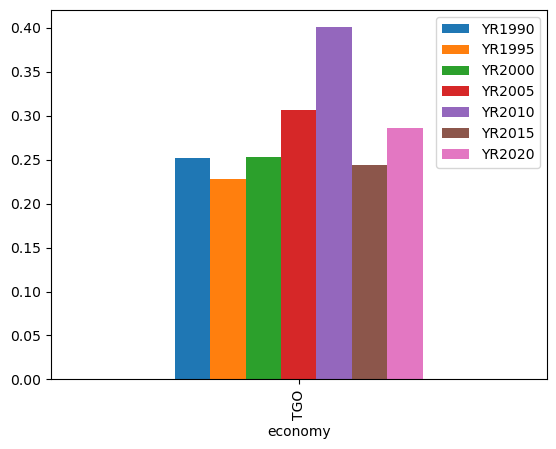

In [40]:
wb.data.DataFrame(['EN.ATM.CO2E.PC'],
                     code_country,
                      time=range(1990,2021,5)).plot.bar()

In [41]:
list_values_gdp = []

gdp=wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in gdp.items():

    list_values_gdp.append(column_data.values)
    
list_values_gdp    #pour afficher la liste des valeurs du dataframe du pays choisi

[array([1800.32017413]),
 array([1736.52352747]),
 array([1620.2926265]),
 array([1385.08246528]),
 array([1587.06768079]),
 array([1636.81523647]),
 array([1714.80513216]),
 array([1898.7117835]),
 array([1801.78639414]),
 array([1793.53263883]),
 array([1729.70175791]),
 array([1697.37871238]),
 array([1716.91346228]),
 array([1785.15463371]),
 array([1721.87620122]),
 array([1599.45858532]),
 array([1596.38773547]),
 array([1532.42006065]),
 array([1549.44041224]),
 array([1588.96477697]),
 array([1637.65195835]),
 array([1687.61106815]),
 array([1747.88421246]),
 array([1802.93897953]),
 array([1856.90481374]),
 array([1910.00004506]),
 array([1941.62759622]),
 array([1970.21483978]),
 array([2014.94172914]),
 array([2063.75873637]),
 array([2058.56505955]),
 array([2130.85891737])]

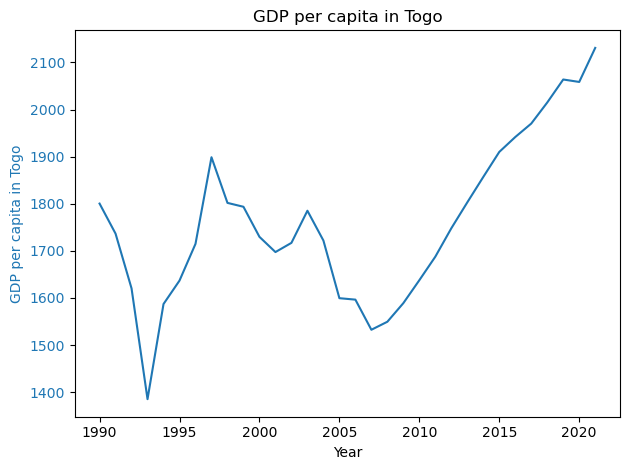

In [42]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'GDP per capita in {country}', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:blue', label=f'GDP per cap in {country}')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title(f'GDP per capita in {country}')
fig.tight_layout()
plt.show()

#évolution en courbe du PIB du pays choisi

In [43]:
list_values_life_expectancy = []

life_expectancy=wb.data.DataFrame('SP.DYN.LE00.IN', 
                    economy = code_country, 
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')


for (column_name, column_data) in life_expectancy.items():

    list_values_life_expectancy.append(column_data.values)
    
list_values_life_expectancy

[array([54.37]),
 array([54.268]),
 array([54.299]),
 array([54.195]),
 array([54.037]),
 array([54.037]),
 array([54.098]),
 array([54.192]),
 array([54.199]),
 array([54.538]),
 array([54.742]),
 array([54.86]),
 array([55.311]),
 array([55.639]),
 array([55.569]),
 array([55.962]),
 array([56.222]),
 array([56.511]),
 array([56.695]),
 array([57.011]),
 array([57.304]),
 array([57.925]),
 array([58.073]),
 array([58.684]),
 array([58.853]),
 array([59.396]),
 array([59.55]),
 array([60.154]),
 array([60.244]),
 array([60.901]),
 array([61.035]),
 array([61.619])]

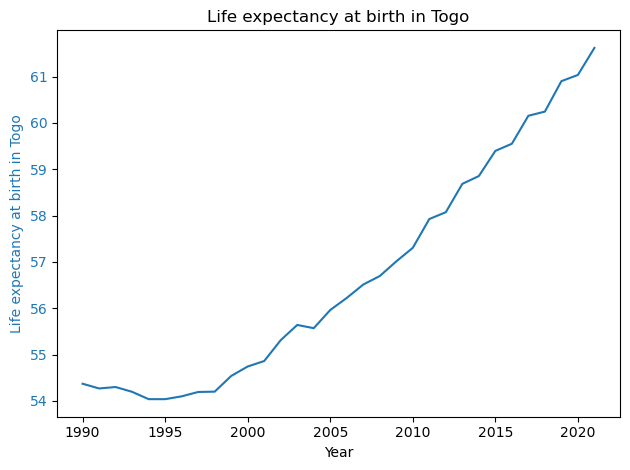

In [44]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'Life expectancy at birth in {country}', color='tab:blue')
ax1.plot(years, list_values_life_expectancy, color='tab:blue', label= f'Life expectancy at birth in {country}')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title(f'Life expectancy at birth in {country}')
fig.tight_layout()
plt.show()

In [45]:
list_values_CO2_emissions = []

CO2_emissions=wb.data.DataFrame('EN.ATM.CO2E.PC', 
                    economy = code_country, 
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')


for (column_name, column_data) in CO2_emissions.items():

    list_values_CO2_emissions.append(column_data.values)

list_values_CO2_emissions


[array([0.25222223]),
 array([0.23194239]),
 array([0.18167565]),
 array([0.15523275]),
 array([0.22159442]),
 array([0.22838764]),
 array([0.30513624]),
 array([0.16629106]),
 array([0.25370657]),
 array([0.35090811]),
 array([0.2533928]),
 array([0.22896063]),
 array([0.2545092]),
 array([0.33827701]),
 array([0.31952028]),
 array([0.30606151]),
 array([0.26720052]),
 array([0.24864668]),
 array([0.25211805]),
 array([0.44145429]),
 array([0.40020664]),
 array([0.37275482]),
 array([0.322783]),
 array([0.2461221]),
 array([0.21794958]),
 array([0.2442853]),
 array([0.30093897]),
 array([0.25706771]),
 array([0.27214954]),
 array([0.29628438]),
 array([0.28606184]),
 array([nan])]

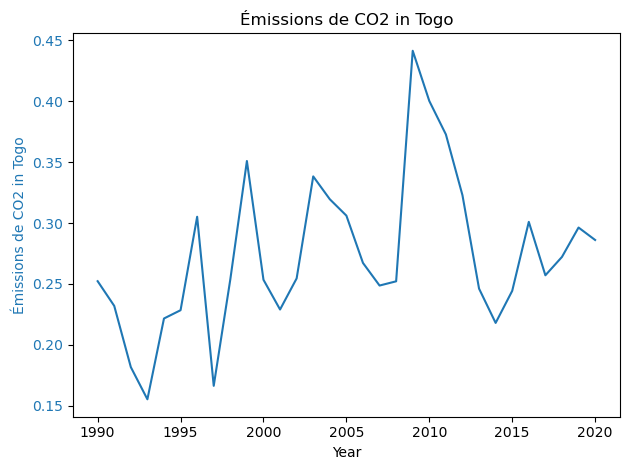

In [46]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'Émissions de CO2 in {country}', color='tab:blue')
ax1.plot(years, list_values_CO2_emissions, color='tab:blue', label=f'Émissions de CO2 in {country}')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title(f'Émissions de CO2 in {country}')
fig.tight_layout()
plt.show()



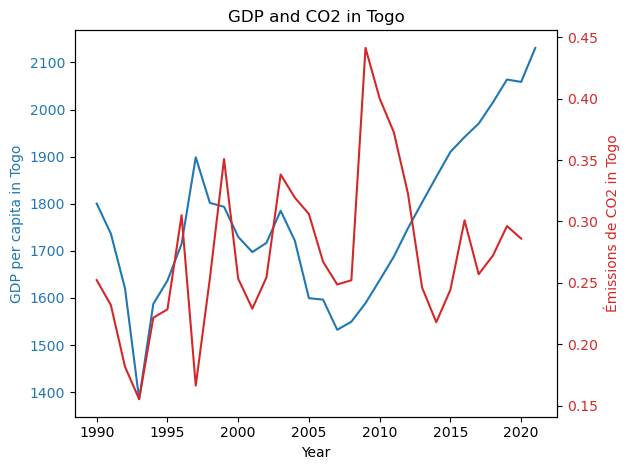

In [47]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'GDP per capita in {country}', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:blue', label=f'GDP per capita in {country}')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2=ax1.twinx()
ax2.set_ylabel(f'Émissions de CO2 in {country}', color='tab:red')
ax2.plot(years, list_values_CO2_emissions, color='tab:red', label=f'Émissions de CO2 in {country}')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'GDP and CO2 in {country}')
fig.tight_layout()
plt.show()

#évolution du PIB et de l'émission du CO2

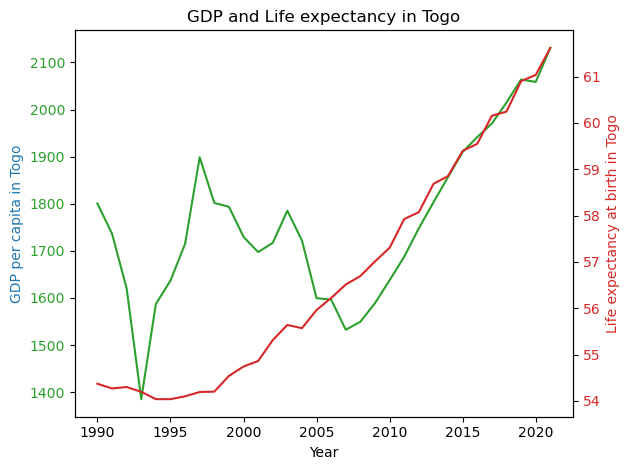

In [48]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'GDP per capita in {country}', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:green', label=f'GDP per capita in {country}')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_ylabel(f'Life expectancy at birth in {country}', color='tab:red')
ax2.plot(years, list_values_life_expectancy, color='tab:red', label=f'Life expectancy at birth in {country}')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'GDP and Life expectancy in {country}')
fig.tight_layout()
plt.show()
#évolution du PIB et de l'espérance de vie

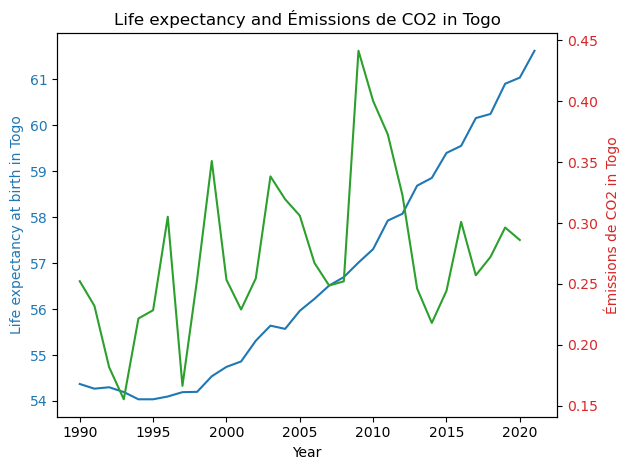

In [49]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel(f'Life expectancy at birth in {country}', color='tab:blue')
ax1.plot(years, list_values_life_expectancy, color='tab:blue', label=f'Life expectancy at birth in {country}')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2=ax1.twinx()
ax2.set_ylabel(f'Émissions de CO2 in {country}', color='tab:red')
ax2.plot(years, list_values_CO2_emissions, color='tab:green', label=f'Émissions de CO2 in {country}')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'Life expectancy and Émissions de CO2 in {country}')
fig.tight_layout()
plt.show() #évolution de l'émission du CO2 et de l'espérance de vie

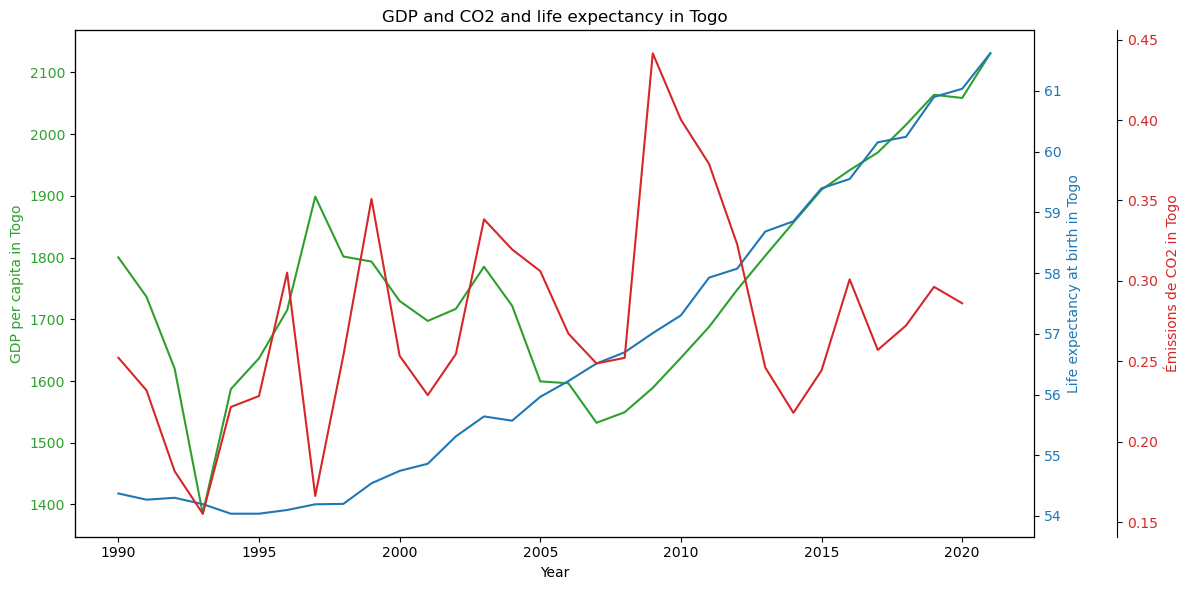

In [50]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel(f'GDP per capita in {country}', color='tab:green')
ax1.plot(years, list_values_gdp, color='tab:green', label=f'GDP per capita in {country}')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel(f'Life expectancy at birth in {country}', color='tab:blue')
ax2.plot(years, list_values_life_expectancy, color='tab:blue', label=f'Life expectancy at birth in {country}')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel(f'Émissions de CO2 in {country}', color='tab:red')
ax3.plot(years, list_values_CO2_emissions, color='tab:red', label=f'Émissions de CO2 in {country}')
ax3.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'GDP and CO2 and life expectancy in {country}')
fig.tight_layout()
plt.show()

#évolution du PIB, du CO2 et de l'espérance de vie

In [81]:
wb.topic.info()

id,value
1,Agriculture & Rural Development
2,Aid Effectiveness
3,Economy & Growth
4,Education
5,Energy & Mining
6,Environment
7,Financial Sector
8,Health
9,Infrastructure
10,Social Protection & Labor


In [82]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [92]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [100]:
df_indicator = wb.topic.info()

table = wb.series.info()
table_dict = vars(table)
df_source = pd.DataFrame(table_dict.get('items')) # pour avoir la liste des pays et les id

type(df_source)
# print((df_indicator))
df = pd.DataFrame(df_source, columns=['id', 'value']) 

lis_indicators = []
#print(lis_indicators)
type(lis_indicators)

for index, row in df.iterrows():
#  # print(row["id"], row["value"])
    lis_indicators.append((row["id"], row["value"]))
    
code_indicator = ''
indicator = ''
# lis_country[0][0] #y[lis_country.index('TGO')]
def check_code_indicator(code_input_indicator : str) -> True:
    # [T for item in lis_country if 'TGO' in item]
    if any(code_input_indicator in code for code in lis_indicators):
        global code_indicator, indicator
        for i in range(len(lis_indicators)):
            if lis_indicators[i][0] == value_input_indicator:
                print(f"Vous avez choisi cet indicateur:  {lis_indicators[i][0]} ### {lis_indicators[i][1]}") 
                code_indicator, indicator = lis_indicators[i][0], lis_indicators[i][1]
                return True
    return False

In [101]:
value_input_indicator = str(input("Please, enter indicator code: ")).upper()


check_code_indicator(value_input_indicator)
print(code_indicator, indicator)

Please, enter indicator code: NY.GDP.PCAP.PP.CD
Vous avez choisi cet indicateur:  NY.GDP.PCAP.PP.CD ### GDP per capita, PPP (current international $)
NY.GDP.PCAP.PP.CD GDP per capita, PPP (current international $)


In [ ]:
#QUESTION 2 : Analyse Temporelle des Tendances Économiques

# PIB par habitant, ($ PPA internationaux courants). NY.GDP.PCAP.PP.CD
# Inflation, prix à la consommation (% annuel). FP.CPI.TOTL.ZG
# Chômage (% de la population active) (estimation nationale). SL.UEM.TOTL.NE.ZS

In [102]:
PIB_indicator = wb.data.DataFrame(code_indicator, code_country, range(1990, 2022))  # PIB par habitant, ($ PPA internationaux courants)

PIB_indicator

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
TGO,1145.240353,1142.014173,1089.859139,953.732736,1116.150868,1175.275469,1253.818456,1412.225991,1355.218375,1368.020987,...,1677.296286,1739.13225,1818.041895,1884.96673,1928.141125,1970.21484,2063.382109,2151.285143,2173.872929,2351.313774


In [ ]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.CD'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar()

In [ ]:
Inflation_indicator = wb.data.DataFrame('FP.CPI.TOTL.ZG', code_country, range(1990, 2022))  # Inflation, prix à la consommation (% annuel). 

Inflation_indicator 

In [ ]:
wb.data.DataFrame(['FP.CPI.TOTL.ZG'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar()

In [ ]:
Chomage_indicator = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', code_country, range(1990, 2022))  # Chômage (% de la population active) (estimation nationale).

Chomage_indicator  

In [ ]:
wb.data.DataFrame(['SL.UEM.TOTL.NE.ZS'],
                     code_country,
                      time=range(1990,2022)).plot.bar()

In [ ]:
list_values_PIB = []

PIB=wb.data.DataFrame('NY.GDP.PCAP.PP.CD', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in PIB.items():

    list_values_PIB.append(column_data.values)
    
list_values_PIB 

In [5]:
list_values_Inflation = []

Inflation=wb.data.DataFrame('FP.CPI.TOTL.ZG', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Inflation.items():

    list_values_Inflation.append(column_data.values)
    
list_values_Inflation

[array([3.19428338]),
 array([3.21340732]),
 array([2.36376046]),
 array([2.10446277]),
 array([1.65551533]),
 array([1.79648142]),
 array([1.98288365]),
 array([1.20394294]),
 array([0.65112687]),
 array([0.53714164]),
 array([1.67595989]),
 array([1.6347808]),
 array([1.92341229]),
 array([2.09847219]),
 array([2.14208965]),
 array([1.74586936]),
 array([1.6751245]),
 array([1.48799806]),
 array([2.81286195]),
 array([0.08762048]),
 array([1.5311227]),
 array([2.11159795]),
 array([1.95419532]),
 array([0.8637155]),
 array([0.50775882]),
 array([0.03751438]),
 array([0.18333486]),
 array([1.03228275]),
 array([1.85081508]),
 array([1.10825492]),
 array([0.47649885])]

In [ ]:

list_values_Chomage = []

Chomage=wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Chomage.items():

    list_values_Chomage.append(column_data.values)
    
list_values_Chomage 

# les données sur le chômage du Togo sont manquantes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('PIB par habitant, ($ PPA internationaux courants)', color='tab:blue')
ax1.plot(years, list_values_PIB, color='tab:blue', label='PIB par habitant, ($ PPA internationaux courants)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('PIB par habitant, ($ PPA internationaux courants)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation au Togo', color='tab:blue')
ax1.plot(years, list_values_Inflation, color='tab:blue', label='Inflation au Togo')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Inflation au Togo')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('PIB par habitant, ($ PPA internationaux courants)', color='tab:green')
ax1.plot(years, list_values_PIB, color='tab:green', label='PIB par habitant, ($ PPA internationaux courants)')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation au Togo', color='tab:blue')
ax2.plot(years, list_values_Inflation, color='tab:blue', label='Inflation au Togo')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.set_ylabel('Chômage au Togo', color='tab:red')
ax3.plot(years, list_values_Chomage, color='tab:red', label='Chômage au Togo')
ax3.tick_params(axis='y', labelcolor='tab:red')

plt.title('PIB par habitant et Inflation au Togo')
fig.tight_layout()
plt.show()

In [ ]:
#QUESTION 3 : Analyse de Cluster

# PIB par habitant. NY.GDP.PCAP.PP.KD
# Pauvreté à $ 1,90 par jour (2011 PPA) (%). SI.POV.GAPS
# Indice du capital humain, limite supérieure (échelle comprise entre 0 et 1). HD.HCI.OVRL.UB
# Indice du capital humain, limite inférieure (échelle comprise entre 0 et 1). HD.HCI.OVRL.LB

In [ ]:
PIB_HA = wb.data.DataFrame('NY.GDP.PCAP.PP.KD', code_country, range(1990, 2022)) # PIB par habitant
PIB_HA

In [ ]:
Pauvrete_indic = wb.data.DataFrame('SI.POV.GAPS', code_country, range(1990, 2022))  # Pauvreté à $ 1,90 par jour (2011 PPA) (%)
Pauvrete_indic

In [ ]:
ICH_lim_sup_indicator = wb.data.DataFrame('HD.HCI.OVRL.UB', code_country, range(1990, 2022))  # Indice du capital humain, limite supérieure (échelle comprise entre 0 et 1)
ICH_lim_sup_indicator

In [ ]:
ICH_lim_inf_indicator = wb.data.DataFrame('HD.HCI.OVRL.LB', code_country, range(1990, 2022))  # Indice du capital humain, limite inférieure (échelle comprise entre 0 et 1)
ICH_lim_inf_indicator

In [ ]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SI.POV.GAPS'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['HD.HCI.OVRL.UB'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['HD.HCI.OVRL.LB'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
list_values_PIB_HA = []

PIB_HA=wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in PIB_HA.items():

    list_values_PIB_HA.append(column_data.values)
    
list_values_PIB_HA    

In [ ]:
list_values_Pauvrete_indic = []

Pauvrete_indic=wb.data.DataFrame('SI.POV.GAPS', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Pauvrete_indic.items():

    list_values_Pauvrete_indic.append(column_data.values)
    
list_values_Pauvrete_indic  

# Données manquantes

In [ ]:
list_values_ICH_lim_sup_indicator = []

ICH_lim_sup_indicator=wb.data.DataFrame('HD.HCI.OVRL.UB', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in ICH_lim_sup_indicator.items():

    list_values_ICH_lim_sup_indicator.append(column_data.values)
    
list_values_ICH_lim_sup_indicator  # Données manquantes

In [ ]:
list_values_ICH_lim_inf_indicator = []

ICH_lim_inf_indicator=wb.data.DataFrame('HD.HCI.OVRL.LB', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in ICH_lim_inf_indicator.items():

    list_values_ICH_lim_inf_indicator.append(column_data.values)
    
list_values_ICH_lim_inf_indicator  # Données manquantes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_PIB_HA, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Indice de pauvreté', color='tab:blue')
ax1.plot(years, list_values_Pauvrete_indic , color='tab:blue', label='Indice de pauvreté')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Indice de pauvreté')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('ICH limite supérieure', color='tab:blue')
ax1.plot(years, list_values_ICH_lim_sup_indicator, color='tab:blue', label='ICH limite supérieure')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('ICH limite supérieure')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('ICH limite inférieure', color='tab:blue')
ax1.plot(years, list_values_ICH_lim_inf_indicator, color='tab:blue', label='ICH limite inférieure')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('ICH limite inférieure')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:green')
ax1.plot(years, list_values_gdp, color='tab:green', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('ICH limite supérieure', color='tab:blue')
ax2.plot(years, list_values_ICH_lim_sup_indicator, color='tab:blue', label='ICH limite supérieure')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('ICH limite inférieure', color='tab:red')
ax3.plot(years, list_values_ICH_lim_inf_indicator, color='tab:red', label='ICH limite inférieure')
ax3.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP et ICH au Togo')
fig.tight_layout()
plt.show()

In [ ]:
###QUESTION 4 : Prédictions des Tendances Futures

# Agriculture, valeur ajoutée (% de croissance annuelle). NV.AGR.TOTL.KD.ZG

# Industrie, valeur ajoutée (en $ US actuels). NV.IND.TOTL.CD
# Industrie, valeur ajoutée (% du PIB). NV.IND.TOTL.ZS

# Industrie, valeur ajoutée (% de croissance annuelle). NV.IND.TOTL.KD.ZG

# Inflation, prix à la consommation (% annuel). FP.CPI.TOTL.ZG


In [ ]:
Agriculture = wb.data.DataFrame('NV.AGR.TOTL.KD.ZG', code_country, range(1990, 2022)) # PIB par habitant
Agriculture

In [ ]:
Industrie_actu = wb.data.DataFrame('NV.IND.TOTL.CD', code_country, range(1990, 2022)) # PIB par habitant
Industrie_actu

In [ ]:
Industrie_PIB = wb.data.DataFrame('NV.IND.TOTL.ZS', code_country, range(1990, 2022)) # PIB par habitant
Industrie_PIB

In [ ]:
Industrie_croissance_annuelle = wb.data.DataFrame('NV.IND.TOTL.KD.ZG', code_country, range(1990, 2022)) # PIB par habitant
Industrie_croissance_annuelle

In [ ]:
Inflation_conso = wb.data.DataFrame('FP.CPI.TOTL.ZG', code_country, range(1990, 2022)) # PIB par habitant
Inflation_conso

In [ ]:
wb.data.DataFrame(['NV.AGR.TOTL.KD.ZG'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['NV.IND.TOTL.CD'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['NV.IND.TOTL.ZS'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['NV.IND.TOTL.KD.ZG'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['FP.CPI.TOTL.ZG'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
list_values_Agriculture = []

Agriculture=wb.data.DataFrame('NV.AGR.TOTL.KD.ZG', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Agriculture.items():

    list_values_Agriculture.append(column_data.values)
    
list_values_Agriculture 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Agriculture, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax1.plot(years, list_values_Agriculture, color='tab:blue', label='Agriculture, valeur ajoutée (% de croissance annuelle)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Agriculture, valeur ajoutée (% de croissance annuelle)')
fig.tight_layout()
plt.show()

In [ ]:
list_values_Industrie_actu = []

Industrie_actu=wb.data.DataFrame('NV.IND.TOTL.CD', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_actu.items():

    list_values_Industrie_actu.append(column_data.values)
    
list_values_Industrie_actu 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (en $ US actuels)', color='tab:blue')
ax1.plot(years, list_values_Industrie_actu, color='tab:blue', label='Industrie, valeur ajoutée (en $ US actuels)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (en $ US actuels)')
fig.tight_layout()
plt.show()

In [ ]:
list_values_Industrie_PIB = []

gdp=wb.data.DataFrame('NV.IND.TOTL.ZS', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_PIB.items():

    list_values_Industrie_PIB.append(column_data.values)
    
list_values_Industrie_PIB 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (% du PIB)', color='tab:blue')
ax1.plot(years, list_values_Industrie_PIB, color='tab:blue', label='Industrie, valeur ajoutée (% du PIB)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (% du PIB)')
fig.tight_layout()
plt.show()

In [ ]:
list_values_Industrie_croissance_annuelle = []

Industrie_croissance_annuelle=wb.data.DataFrame('NV.IND.TOTL.KD.ZG', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_croissance_annuelle.items():

    list_values_Industrie_croissance_annuelle.append(column_data.values)
    
list_values_Industrie_croissance_annuelle 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax1.plot(years, list_values_Industrie_croissance_annuelle, color='tab:blue', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (% de croissance annuelle)')
fig.tight_layout()
plt.show()

In [ ]:
list_values_Inflation_conso = []

Inflation_conso=wb.data.DataFrame('FP.CPI.TOTL.ZG', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Inflation_conso.items():

    list_values_Inflation_conso.append(column_data.values)
    
list_values_Inflation_conso 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Inflation_conso, color='tab:blue', label='Inflation, prix à la consommation (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Inflation, prix à la consommation (% annuel)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Agriculture, valeur ajoutée', color='tab:green')
ax1.plot(years, list_values_Agriculture, color='tab:green', label='Agriculture')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Industrie, valeur ajoutée (en $ US actuels)', color='tab:blue')
ax2.plot(years, list_values_Industrie_actu, color='tab:blue', label='Industrie, valeur ajoutée (en $ US actuels)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.set_ylabel('Industrie, valeur ajoutée (% du PIB)', color='tab:red')
ax3.plot(years, list_values_Industrie_PIB, color='tab:red', label='Industrie, valeur ajoutée (% du PIB)')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:cyan')
ax4.plot(years, list_values_Industrie_croissance_annuelle, color='tab:cyan', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax4.tick_params(axis='y', labelcolor='tab:cyan')

ax5=ax1.twinx()
ax5.spines['right'].set_position(('outward', 80))
ax5.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:gray')
ax5.plot(years, list_values_Inflation_conso, color='tab:gray', label='Inflation, prix à la consommation (% annuel)')
ax5.tick_params(axis='y', labelcolor='tab:gray')

plt.title('Agriculture, Industrie et inflation au Togo')
fig.tight_layout()
plt.show()

In [ ]:

# Migration nette. SM.POP.NETM
# Population urbaine (% du total). SP.URB.TOTL.IN.ZS
# Croissance de la population rurale (% annuel). SP.RUR.TOTL.ZG
# Population, total. SP.POP.TOTL
# Croissance de la population (% annuel). SP.POP.GROW
# Croissance de la population urbaine (% annuel). SP.URB.GROW

In [ ]:
Migration_nette = wb.data.DataFrame('SM.POP.NETM', code_country, range(1990, 2022)) 
Migration_nette

In [ ]:
Population_urbaine = wb.data.DataFrame('SP.URB.TOTL.IN.ZS', code_country, range(1990, 2022)) 
Population_urbaine

In [ ]:
Croissance_pop_rurale = wb.data.DataFrame('SP.RUR.TOTL.ZG', code_country, range(1990, 2022)) 
Croissance_pop_rurale

In [ ]:
Population_total = wb.data.DataFrame('SP.POP.TOTL', code_country, range(1990, 2022)) # PIB par habitant
Population_total

In [ ]:
Croissance_population = wb.data.DataFrame('SP.POP.GROW', code_country, range(1990, 2022))
Croissance_population

In [ ]:
Croissance_population_urbaine = wb.data.DataFrame('SP.URB.GROW', code_country, range(1990, 2022))
Croissance_population_urbaine

In [ ]:
wb.data.DataFrame(['SM.POP.NETM'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SP.URB.TOTL.IN.ZS'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SP.RUR.TOTL.ZG'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SP.POP.TOTL'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SP.POP.GROW'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
wb.data.DataFrame(['SP.URB.GROW'],
                     code_country,
                      time=range(1990,2022,5)).plot.bar() 

In [ ]:
list_values_Migration_nette = []

Migration_nette=wb.data.DataFrame('SM.POP.NETM', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Migration_nette.items():

    list_values_Migration_nette.append(column_data.values)
    
list_values_Migration_nette 

In [ ]:
list_values_Population_urbaine = []

Population_urbaine=wb.data.DataFrame('SP.URB.TOTL.IN.ZS', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Population_urbaine.items():

    list_values_Population_urbaine.append(column_data.values)
    
list_values_Population_urbaine 

In [ ]:
list_values_Croissance_pop_rurale = []

Croissance_pop_rurale=wb.data.DataFrame('SP.RUR.TOTL.ZG', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_pop_rurale.items():

    list_values_Croissance_pop_rurale.append(column_data.values)
    
list_values_Croissance_pop_rurale 

In [ ]:
list_values_Population_total = []

Population_total=wb.data.DataFrame('SP.POP.TOTL', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Population_total.items():

    list_values_Population_total.append(column_data.values)
    
list_values_Population_total

In [ ]:
list_values_Croissance_population_urbaine = []

Croissance_population_urbaine=wb.data.DataFrame('SP.URB.GROW', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_population_urbaine.items():

    list_values_Croissance_population_urbaine.append(column_data.values)
    
list_values_Croissance_population_urbaine 

In [ ]:
list_values_Croissance_population = []

Croissance_population=wb.data.DataFrame('SP.POP.GROW', 
                    economy = code_country,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_population.items():

    list_values_Croissance_population.append(column_data.values)
    
list_values_Croissance_population 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:blue')
ax1.plot(years, list_values_Migration_nette, color='tab:blue', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Migration nette')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Population urbaine (% du total)', color='tab:blue')
ax1.plot(years, list_values_Population_urbaine, color='tab:blue', label='Population urbaine (% du total)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Population urbaine (% du total)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population rurale (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_pop_rurale, color='tab:blue', label='Croissance de la population rurale (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population rurale (% annuel)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Population, total', color='tab:blue')
ax1.plot(years, list_values_Population_total, color='tab:blue', label='Population, total')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Population, total')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_population_urbaine, color='tab:blue', label='Croissance de la population (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population (% annuel)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population urbaine (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_population, color='tab:blue', label='Croissance de la population urbaine (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population urbaine (% annuel)')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:green')
ax1.plot(years, list_values_Migration_nette, color='tab:green', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Population urbaine', color='tab:blue')
ax2.plot(years, list_values_Population_urbaine, color='tab:blue', label='Population urbaine')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Population, total', color='tab:red')
ax3.plot(years, list_values_Population_total, color='tab:red', label='Population, total')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Croissance de la population', color='tab:cyan')
ax4.plot(years, list_values_Croissance_population, color='tab:cyan', label='Croissance de la population')
ax4.tick_params(axis='y', labelcolor='tab:cyan')

plt.title('Evolution de la population Togolaise')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2022)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:green')
ax1.plot(years, list_values_Migration_nette, color='tab:green', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.spines['left'].set_position(('outward', 20))
ax2.set_xlabel('Year')
ax2.set_ylabel('Agriculture, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax2.plot(years, list_values_Agriculture, color='tab:blue', label='Agriculture, valeur ajoutée (% de croissance annuelle)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 20))
ax3.set_ylabel('Population, total', color='tab:red')
ax3.plot(years, list_values_Population_total, color='tab:red', label='Population, total')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 40))
ax4.set_ylabel('Croissance de la population', color='tab:cyan')
ax4.plot(years, list_values_Croissance_population, color='tab:cyan', label='Croissance de la population')
ax4.tick_params(axis='y', labelcolor='tab:cyan')

ax5=ax1.twinx()
ax5.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:gray')
ax5.plot(years, list_values_Industrie_croissance_annuelle, color='tab:gray', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax5.tick_params(axis='y', labelcolor='tab:gray')

ax6=ax1.twinx()
ax6.spines['right'].set_position(('outward', 80))
ax6.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:orange')
ax6.plot(years, list_values_Inflation_conso, color='tab:orange', label='Inflation, prix à la consommation (% annuel)')
ax6.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Evolution de la population Togolaise')
fig.tight_layout()
plt.show()

In [ ]:
#QUESTION 5 : Analyse Comparative avec d'Autres Pays

# Croissance du PIB par habitant (% annuel). NY.GDP.PCAP.KD.ZG
# Croissance du PIB (% annuel). NY.GDP.MKTP.KD.ZG
# Taux de croissance moyen annualisé du niveau de vie par habitant, population totale (%). SI.SPR.PCAP.ZG


#Total de dette extérieure (% du RNB). DT.TDS.DECT.GN.ZS

In [123]:
countries_compare = []

for country in wb.region.members('WLD'):
    if country in ('TGO', "BEN", "RWA", "FRA", 'CAN'):
        countries_compare.append(country)
countries_compare = set(countries_compare)
wb.economy.info(countries_compare)

id,value,region,incomeLevel
BEN,Benin,SSF,LMC
CAN,Canada,NAC,HIC
FRA,France,ECS,HIC
RWA,Rwanda,SSF,LIC
TGO,Togo,SSF,LIC
,5 elements,,


In [124]:
wb.economy.DataFrame(countries_compare)

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
id,,,,,,,,,
BEN,Benin,False,2.63230,6.47790,SSF,SSA,IDX,LMC,Porto-Novo
CAN,Canada,False,-75.69190,45.42150,NAC,,LNX,HIC,Ottawa
FRA,France,False,2.35097,48.85660,ECS,,LNX,HIC,Paris
RWA,Rwanda,False,30.05870,-1.95325,SSF,SSA,IDX,LIC,Kigali
TGO,Togo,False,1.22550,6.12280,SSF,SSA,IDX,LIC,Lome


In [125]:
wb.data.DataFrame(['NY.GDP.PCAP.KD.ZG', 'NY.GDP.MKTP.KD.ZG', 'SI.SPR.PCAP.ZG', 'GC.DOD.TOTL.GD.ZS'], 
                    economy = countries_compare,
               
                    timeColumns = True,
                    labels = True
                    )

,,Country,Series,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,series,,,,,,,,,,,,,,,,,,,,,
BEN,NY.GDP.PCAP.KD.ZG,Benin,GDP per capita growth (annual %),NaN,1.567327,-4.993677,2.952293,4.762979,3.360901,1.614800,-0.879980,...,4.127606,3.290505,-1.181685,0.335852,2.603557,3.624263,3.824507,0.951938,4.238709,3.420679
FRA,NY.GDP.PCAP.KD.ZG,France,GDP per capita growth (annual %),NaN,3.841055,5.682369,5.109072,5.461454,3.693884,4.123017,3.843524,...,0.058150,0.484564,0.754024,0.829057,1.994998,1.500539,1.495899,-7.791009,6.131761,2.142732
CAN,NY.GDP.PCAP.KD.ZG,Canada,GDP per capita growth (annual %),NaN,1.121346,5.445858,3.405213,4.650755,4.409518,4.735676,1.252817,...,1.253614,1.841026,-0.089286,-0.135843,1.811279,1.335564,0.435426,-6.088212,4.409275,1.569015
TGO,NY.GDP.PCAP.KD.ZG,Togo,GDP per capita growth (annual %),NaN,10.337165,2.068068,3.194618,11.967929,12.431521,5.801667,1.473366,...,3.149795,2.993215,2.859340,1.655893,1.472334,2.270153,2.422750,-0.251661,3.511857,3.372720
RWA,NY.GDP.PCAP.KD.ZG,Rwanda,GDP per capita growth (annual %),NaN,-6.825967,8.642566,-11.775520,-14.404949,4.293540,4.045055,3.739979,...,2.257667,3.672777,6.290306,3.413261,1.384346,5.925179,6.876304,-5.664768,8.277013,5.688821
BEN,NY.GDP.MKTP.KD.ZG,Benin,GDP growth (annual %),NaN,3.141280,-3.426410,4.730028,6.650759,5.293863,3.575863,1.078399,...,7.191434,6.357679,1.778151,3.339673,5.671562,6.697254,6.865687,3.848792,7.155452,6.253245
FRA,NY.GDP.MKTP.KD.ZG,France,GDP growth (annual %),NaN,4.980112,6.843470,6.233680,6.652100,4.861508,5.251837,4.921149,...,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.540459,6.435210,2.454758
CAN,NY.GDP.MKTP.KD.ZG,Canada,GDP growth (annual %),NaN,3.163292,7.425385,5.349546,6.642894,6.316714,6.704992,3.091206,...,2.329123,2.870036,0.659177,1.001394,3.039880,2.777041,1.888224,-5.074358,5.011801,3.437982
TGO,NY.GDP.MKTP.KD.ZG,Togo,GDP growth (annual %),NaN,12.169317,3.773653,4.999694,14.286011,15.459713,9.408719,5.500372,...,5.824266,5.633240,5.468031,4.214896,4.007913,4.795183,4.922833,2.162287,5.991569,5.810547


In [126]:
Croissance_PIB_HA =wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_PIB_HA

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Benin,2.689647,2.207365,1.548959,0.372025,1.316512,-1.467814,0.811410,2.982053,1.849625,-0.648437,...,-0.007428,1.800064,4.127606,3.290505,-1.181685,0.335852,2.603557,3.624263,3.824507,0.951938
France,3.212385,1.242527,0.401189,0.109403,2.076625,0.903680,1.741085,1.795236,-0.302484,-3.370397,...,1.700610,-0.171161,0.058150,0.484564,0.754024,0.829057,1.994998,1.500539,1.495899,-7.791009
Canada,4.202683,0.690161,1.903852,0.888030,2.129631,2.234059,1.602575,1.085367,-0.083592,-4.028003,...,2.141536,0.662001,1.253614,1.841026,-0.089286,-0.135843,1.811279,1.335564,0.435426,-6.088212
Togo,-3.558947,-1.868706,1.150878,3.974642,-3.544703,-7.109548,-0.191993,-4.007026,1.110684,2.550880,...,3.050655,3.571507,3.149795,2.993215,2.859340,1.655893,1.472334,2.270153,2.422750,-0.251661
Rwanda,7.029241,6.981408,11.186203,-0.131839,4.711798,6.536954,6.354831,4.772671,8.219969,3.479418,...,5.223938,6.001706,2.257667,3.672777,6.290306,3.413261,1.384346,5.925179,6.876304,-5.664768


In [127]:
list_values_Croissance_PIB_HA = []
# Croissance du PIB par habitant
Croissance_PIB_HA=wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_PIB_HA.items():

    list_values_Croissance_PIB_HA.append(column_data.values)
    
list_values_Croissance_PIB_HA 

[array([ 5.71244559,  2.43024697, -1.33414395, -3.13369561, -4.77249399]),
 array([ 1.08257118,  0.16314633, -3.2953917 , -3.54362783, -4.67252926]),
 array([-0.14985962,  1.09459803, -0.28703143, -6.69330989,  3.50109959]),
 array([  1.22888349,  -1.05943733,   1.53886102, -14.51652358,
        -10.98621085]),
 array([ -1.72072453,   1.97639228,   3.3562268 ,  14.58290178,
        -41.58686137]),
 array([ 3.88594239,  1.73610124,  1.6368094 ,  3.13455792, 60.09054133]),
 array([ 1.67829883,  1.05172456,  0.56246786,  4.76473422, -4.52353448]),
 array([ 2.70244772,  1.97211924,  3.24884931, 10.7246385 , -0.27574313]),
 array([ 0.84800005,  3.20515306,  3.03747599, -5.10479738,  5.44885398]),
 array([ 2.16959373,  2.88869862,  4.31156937, -0.45808734,  3.11494852]),
 array([ 2.68964738,  3.21238485,  4.20268257, -3.55894727,  7.02924095]),
 array([ 2.20736492,  1.24252729,  0.69016125, -1.86870629,  6.981408  ]),
 array([ 1.54895925,  0.40118913,  1.903852  ,  1.15087751, 11.18620306]),

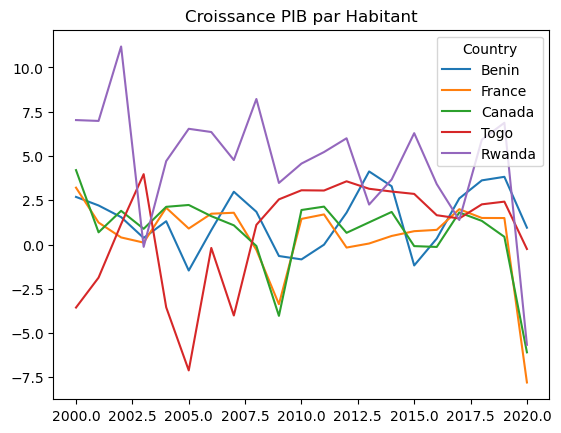

In [128]:
wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance PIB par Habitant');

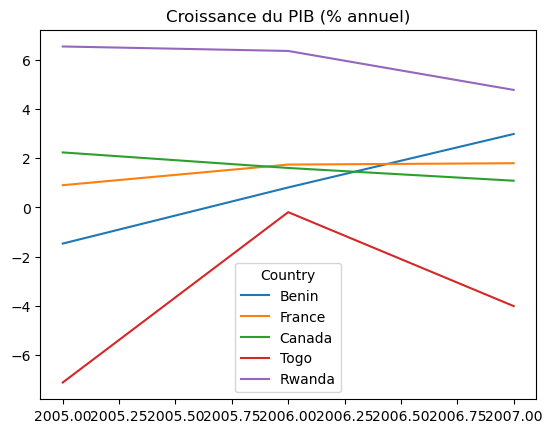

In [129]:
wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2005, 2008), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)'); 
#avant crise éconoique mondiale

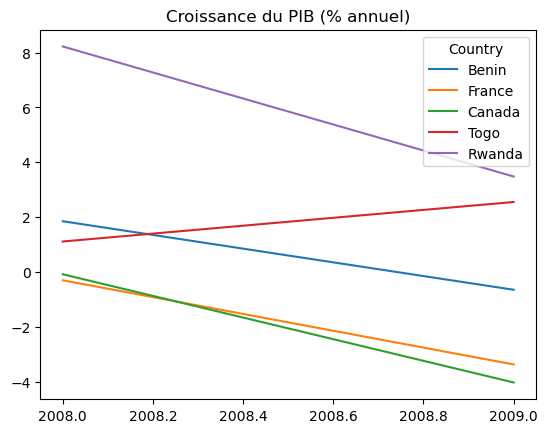

In [130]:
wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2008, 2010), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)');
#période crise économique

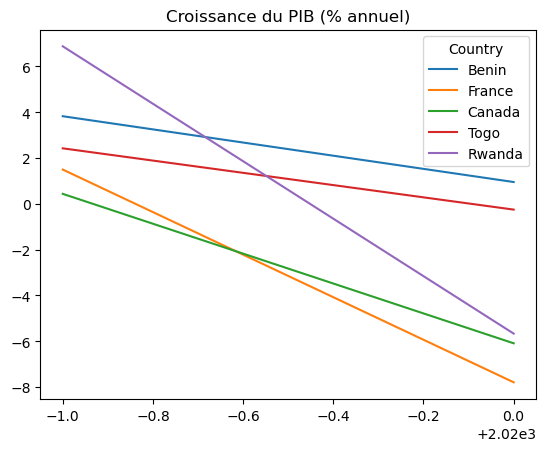

In [131]:
wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2020, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)');
#période covid19

In [ ]:
# Croissance du PIB (% annuel). NY.GDP.MKTP.KD.ZG

In [132]:
Croissance_PIB_annuel =wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_PIB_annuel

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Benin,5.857714,5.333136,4.643031,3.443577,4.429685,1.713165,3.943739,5.986349,4.896577,2.319292,...,2.963753,4.811223,7.191434,6.357679,1.778151,3.339673,5.671562,6.697254,6.865687,3.848792
France,3.923669,1.983721,1.135531,0.823161,2.829753,1.663220,2.449324,2.424736,0.254946,-2.873314,...,2.192701,0.313135,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.540459
Canada,5.177636,1.789973,3.018051,1.801518,3.086981,3.204200,2.634304,2.071825,1.004289,-2.925956,...,3.146100,1.760962,2.329123,2.870036,0.659177,1.001394,3.039880,2.777041,1.888224,-5.074358
Togo,-0.783480,0.823439,3.826623,6.720171,-0.978665,-4.666299,2.650132,-1.175120,4.035645,5.453824,...,5.823252,6.302695,5.824266,5.633240,5.468031,4.214896,4.007913,4.795183,4.922833,2.162287
Rwanda,8.370877,8.484585,13.192071,2.202380,7.447665,9.377898,9.227082,7.633295,11.161255,6.248261,...,7.958394,8.641513,4.719850,6.167167,8.856842,5.970756,3.928876,8.536158,9.462286,-3.376517


In [133]:
list_values_Croissance_PIB_annuel = []
# Croissance du PIB par habitant
Croissance_PIB_annuel=wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_PIB_annuel.items():

    list_values_Croissance_PIB_annuel.append(column_data.values)
    
list_values_Croissance_PIB_annuel 

[array([ 8.97613436,  2.92393508,  0.1646725 , -0.24365613, -2.3992911 ]),
 array([ 4.22579942,  1.04817585, -2.08608549, -0.69996749, -2.51437965]),
 array([ 2.95771083,  1.59934268,  0.90025956, -3.98068681,  5.87272524]),
 array([  5.83617209,  -0.62866635,   2.6608566 , -15.09582749,
         -8.10869188]),
 array([  2.02040045,   2.35840844,   4.49446621,  14.98241435,
        -50.24806711]),
 array([ 6.04519865,  2.10662916,  2.69397628,  7.84583232, 35.22407831]),
 array([ 4.32428403,  1.41299367,  1.61917249,  8.83621163, 12.74569576]),
 array([ 5.73468838,  2.33629653,  4.28004003, 14.37737757, 13.84975248]),
 array([ 3.96101214,  3.58865943,  3.89615183, -2.29987657,  8.85866949]),
 array([5.34144937, 3.4213738 , 5.16291362, 2.48175144, 4.35188832]),
 array([ 5.85771421,  3.92366923,  5.17763567, -0.78347961,  8.3708769 ]),
 array([5.33313571, 1.98372142, 1.78997288, 0.82343875, 8.48458457]),
 array([ 4.64303087,  1.13553148,  3.01805051,  3.82662258, 13.19207117]),
 array([3

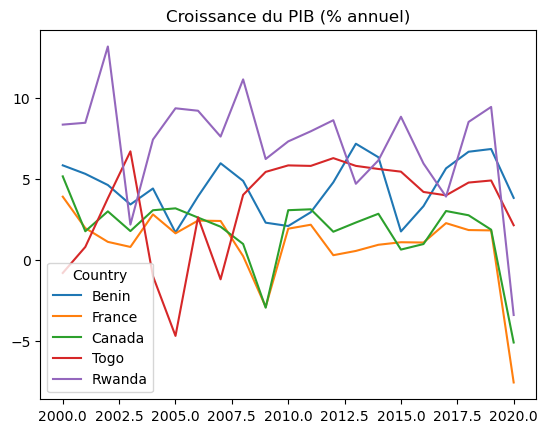

In [134]:
wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)');

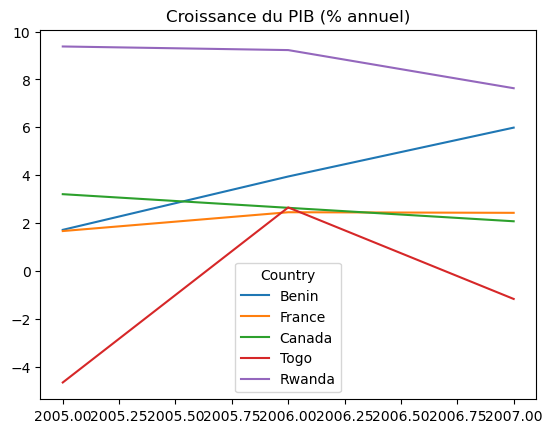

In [135]:
wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2005, 2008), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)'); 
#avant crise éconoique mondiale

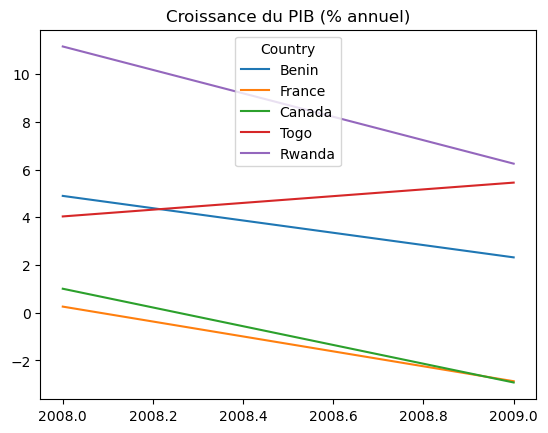

In [136]:
wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2008, 2010), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Croissance du PIB (% annuel)');
#période crise économique

In [230]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
fig.show()

df = wb.data.DataFrame(['NY.GDP.MKTP.KD.ZG'], economy = countries_compare,
                                time=range(2020, 2022),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                                columns='series').sort_values(by=['NY.GDP.MKTP.KD.ZG'])
fig = go.Figure([go.Scatter(x=df['Time'], y=df['NY.GDP.MKTP.KD.ZG'])])
fig.show()
df

,,Country,Time,NY.GDP.MKTP.KD.ZG
economy,time,,,
FRA,YR2020,France,2020,-7.540459
CAN,YR2020,Canada,2020,-5.074358
RWA,YR2020,Rwanda,2020,-3.376517
TGO,YR2020,Togo,2020,2.162287
BEN,YR2020,Benin,2020,3.848792
CAN,YR2021,Canada,2021,5.011801
TGO,YR2021,Togo,2021,5.991569
FRA,YR2021,France,2021,6.435210
BEN,YR2021,Benin,2021,7.155452


<Axes: title={'center': 'Croissance du PIB (%\xa0annuel)'}, xlabel='economy,time'>

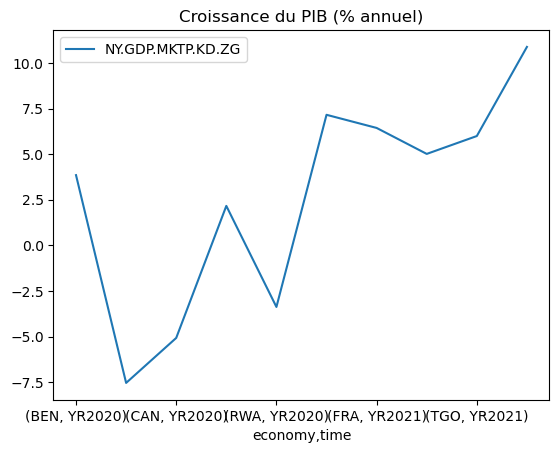

In [213]:
# wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
#                     economy = countries_compare, 
#                     time = range(2020, 2022), numericTimeKeys = True,
#                     labels = True).set_index('Country')#.transpose().plot(title='Croissance du PIB (% annuel)')

wb.data.DataFrame(['NY.GDP.MKTP.KD.ZG'], economy = countries_compare,
                                time=range(2020, 2022),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                                columns='series').sort_values(by=['time']).plot(title='Croissance du PIB (% annuel)')
#période covid19

In [ ]:
# Taux de croissance moyen annualisé du niveau de vie par habitant, population totale (%). SI.SPR.PCAP.ZG

In [138]:
Croissance_annuel_pop_tot =wb.data.DataFrame('SI.SPR.PCAP.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_annuel_pop_tot

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.52
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN
Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN,NaN,NaN
Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.16,NaN,NaN,NaN,NaN


In [153]:
list_values_Croissance_annuel_pop_tot = []

Croissance_annuel_pop_tot=wb.data.DataFrame('EN.POP.DNST', 
                    economy = countries_compare,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_annuel_pop_tot.items():

    list_values_Croissance_annuel_pop_tot.append(column_data.values)
    
Croissance_annuel_pop_tot

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Benin,45.525177,46.940812,48.401720,50.604656,52.530986,53.622836,55.018269,56.642657,58.391123,60.203875,...,86.257361,88.808780,91.421869,94.136609,96.956217,99.858860,102.844794,105.894670,108.996488,112.124184
France,106.004940,106.941587,107.475524,107.943455,108.347825,108.742433,109.131197,109.520942,109.927917,110.497036,...,119.339599,119.918547,120.539577,121.105322,121.536702,121.857823,122.211971,122.650880,123.070294,123.404699
Canada,3.088602,3.127225,3.164461,3.199428,3.234663,3.268308,3.302651,3.335636,3.363434,3.390885,...,3.830125,3.871939,3.913067,3.952605,3.982215,4.027564,4.076166,4.134149,4.193949,4.239226
Togo,71.262125,73.363026,75.495845,74.984225,75.245670,78.682956,81.740816,84.437397,86.933205,89.500662,...,124.079279,127.351259,130.653227,134.002261,137.400791,140.859607,144.379390,147.944089,151.555323,155.223019
Rwanda,296.715120,303.432550,310.385407,320.419133,272.908999,230.518727,272.213620,310.771463,320.820632,324.669112,...,428.736603,439.413620,449.993920,460.820876,471.948075,483.619741,495.757560,507.977625,520.268666,532.888610


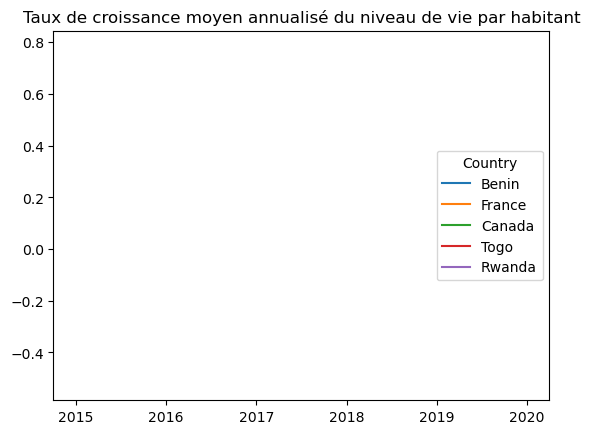

In [140]:
wb.data.DataFrame('SI.SPR.PCAP.ZG', 
                    economy = countries_compare, 
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Taux de croissance moyen annualisé du niveau de vie par habitant');

In [ ]:
#Total de dette extérieure (% du RNB). DT.TDS.DECT.GN.ZS

In [ ]:
Dette_gouv_central =wb.data.DataFrame('DT.TDS.DECT.GN.ZS', 
                    economy = countries_compare, 
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')
Dette_gouv_central

In [ ]:
list_values_Croissance_annuel_pop_tot = []

Croissance_annuel_pop_tot=wb.data.DataFrame('SI.SPR.PCAP.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_annuel_pop_tot.items():

    list_values_Croissance_annuel_pop_tot.append(column_data.values)
    
list_values_Croissance_annuel_pop_tot 

In [ ]:
list_values_Dette_gouv_central = []

Dette_gouv_central=wb.data.DataFrame('DT.TDS.DECT.GN.ZS', 
                    economy = countries_compare,
                      
                    time = range(1990, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Dette_gouv_central.items():

    list_values_Dette_gouv_central.append(column_data.values)
    
list_values_Dette_gouv_central

In [ ]:
wb.data.DataFrame('DT.TDS.DECT.GN.ZS', 
                    economy = countries_compare, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Total de dette extérieure');

In [ ]:
wb.data.DataFrame('DT.TDS.DECT.GN.ZS', 
                    economy = countries_compare, 
                    time = range(2005, 2010), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='Total de dette extérieure entre 2005 et 2010');